In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import os

os.environ['OMP_NUM_THREADS'] = '1'

df = pd.read_csv("CarTypeProject.csv")
df = df.drop(columns = ['url'])

In [58]:
#Data Preprocessing
le = LabelEncoder()
df['body_type'] = le.fit_transform(df['body_type'])
df = pd.get_dummies(df, dtype = int)

mms = MinMaxScaler()
cols = ['horsepower', 'MPG', 'seats', 'curb_weight', 'length', 'width', 'height', 'wheel_base']
df[cols] = mms.fit_transform(df[cols])

y = df['body_type'].values
X = df.drop(columns = 'body_type').values


In [59]:
#Classifiers
forest = RandomForestClassifier(criterion = 'entropy', max_depth = None, n_estimators = 100, n_jobs = -1)
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20)
lr = LogisticRegression(C=0.1, solver='liblinear', max_iter = 10000) 
knn = KNeighborsClassifier(n_neighbors = 4, p = 2, metric = 'minkowski')
bag = BaggingClassifier(estimator = tree, n_estimators = 20, max_samples = 0.6, max_features = 1.0,
                        bootstrap = True, bootstrap_features = False, n_jobs= -1)
svm = SVC(kernel='linear', C=100)


#Classifier Testing
score =0
runs = 0

while True:
    while runs <= 100:
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)
        
        tree.fit(X_train,y_train)
        y_pred = tree.predict(X_test)
        
        score += accuracy_score(y_test,y_pred)
        runs += 1

    print('Average accuracy of Decision Tree: ', (score/runs))
    score = 0
    runs = 0
    
    #Random Forest Classifier
    while runs <= 100:
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)

        forest.fit(X_train, y_train)
        y_pred = forest.predict(X_test)
    
        score += accuracy_score(y_test,y_pred)
        runs += 1

    print('Average accuracy of Random Forest: ', (score/runs))
    score = 0
    runs = 0
    
    #SVM Classifier
    while runs <= 100:
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)
        
        svm.fit(X_train, y_train)
        
        y_pred = svm.predict(X_test)
        
        score += accuracy_score(y_test,y_pred)
        runs += 1
        
    print('Average accuracy of SVM: ', (score/runs))
    score = 0
    runs = 0

     # Bagging
    while runs <= 100:
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y)
        
        bag.fit(X_train, y_train)
        
        y_pred = bag.predict(X_test)
        score += accuracy_score(y_pred, y_test)
        runs += 1
        
    print('Average Accuracy of Bagging (Decision Tree) : ', (score/runs))
    score = 0
    runs = 0
    
    break



Average accuracy of Decision Tree:  0.9580159939070829
Average accuracy of Random Forest:  0.9613480578827108
Average accuracy of SVM:  0.9783891850723525
Average Accuracy of Bagging (Decision Tree) :  0.9538271134805786


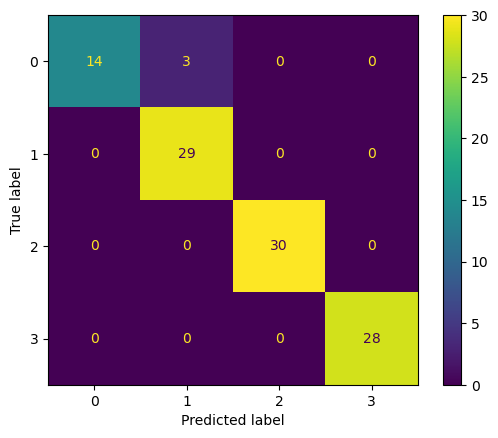

In [60]:
#SVM confusion matrix
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [61]:
#Cross-Validation 

#scores = cross_val_score(estimator = svm, X=X_train,y=y_train,cv=10,n_jobs=1)
#print(f'CV accuracy: {np.mean(scores):.3f}')
#scores

In [62]:
#Parameter Tuning

#param_depth = [None,4,5,6,7,8,9,10,15,20]
#param_estimators = [5,10,15,20,50,100,500]
#param_C = [0.01, 0.1, 1, 10, 100]
#param_grid ={'kernel':['linear', 'rbf'], 'C':param_C}
#gs= GridSearchCV(estimator=svm , param_grid=param_grid, scoring = 'accuracy')
#gs.fit(X_train,y_train)
#print(gs.best_score_)
#print(gs.best_params_)